# Loan Application Status Prediction

### Problem Statement:

    This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 


#### Independent Variables:




- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area



#### Dependent Variable (Target Variable):



- Loan_Status



### Task

    Need to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Extracting data

data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
data.shape

(614, 13)

In [5]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [7]:
columns_with_nan = ["Gender", "Married", "Dependents","Self_Employed","LoanAmount","Loan_Amount_Term","Credit_History"]

In [8]:
for col in columns_with_nan:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


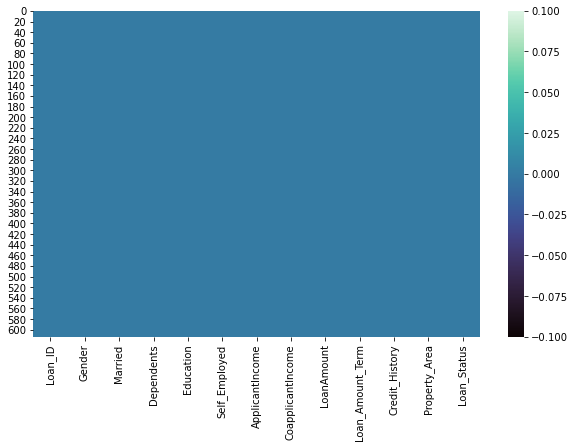

In [10]:
#Plot null values to check if any
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),cmap='mako')
plt.show()

    We rae left with no null values

In [11]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [12]:
data['CoapplicantIncome'].value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
1625.0      3
         ... 
2365.0      1
1695.0      1
2466.0      1
2375.0      1
1700.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

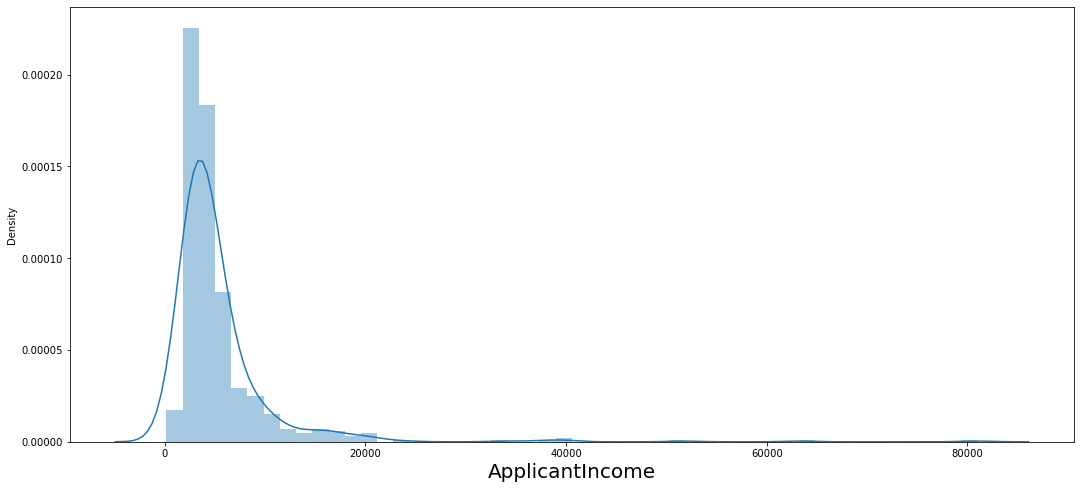

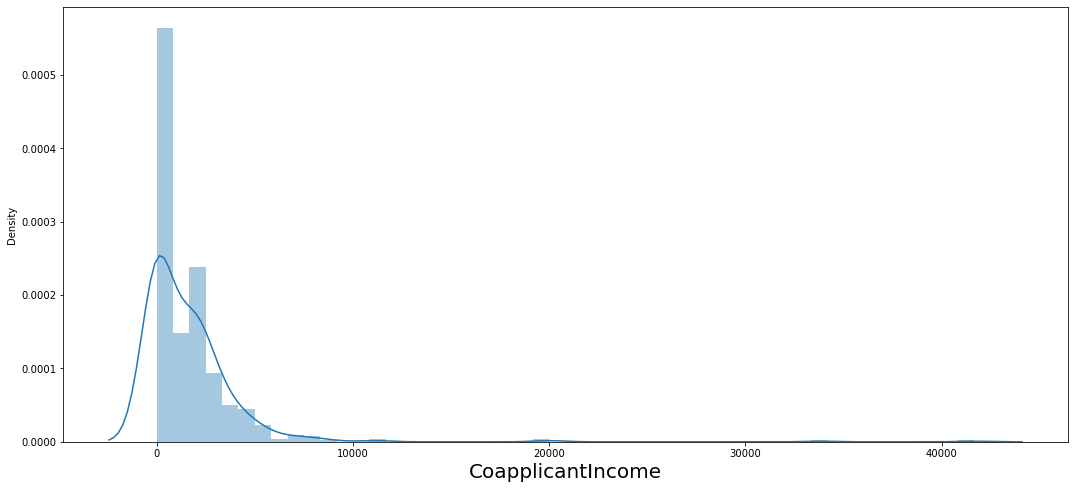

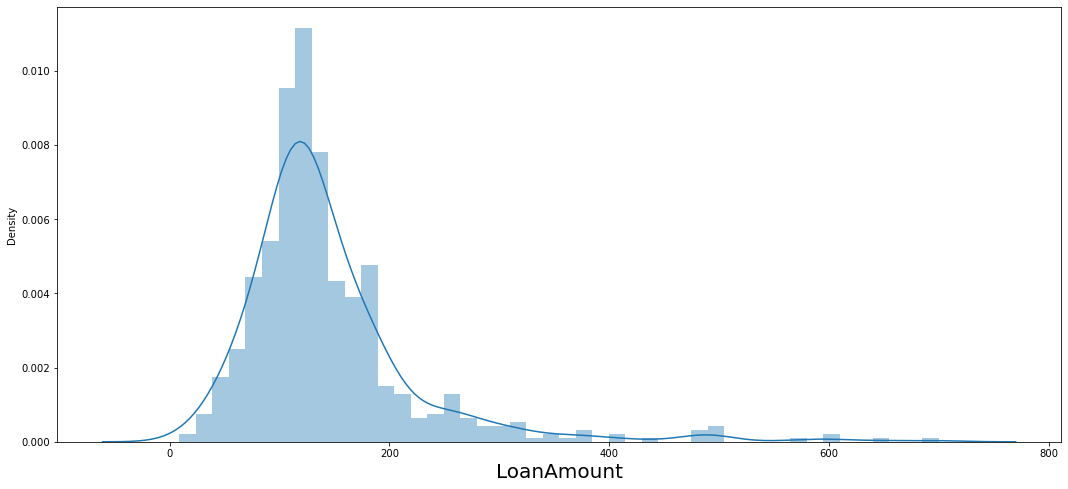

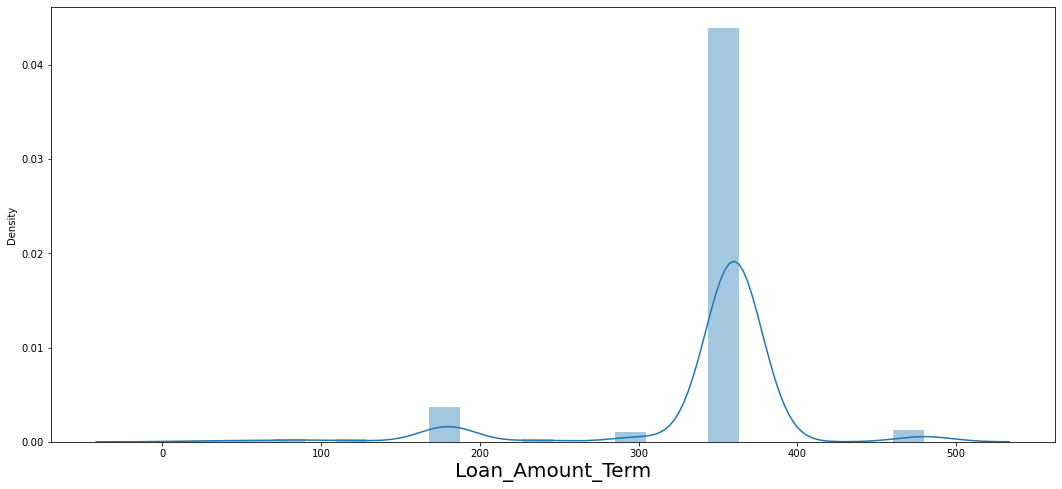

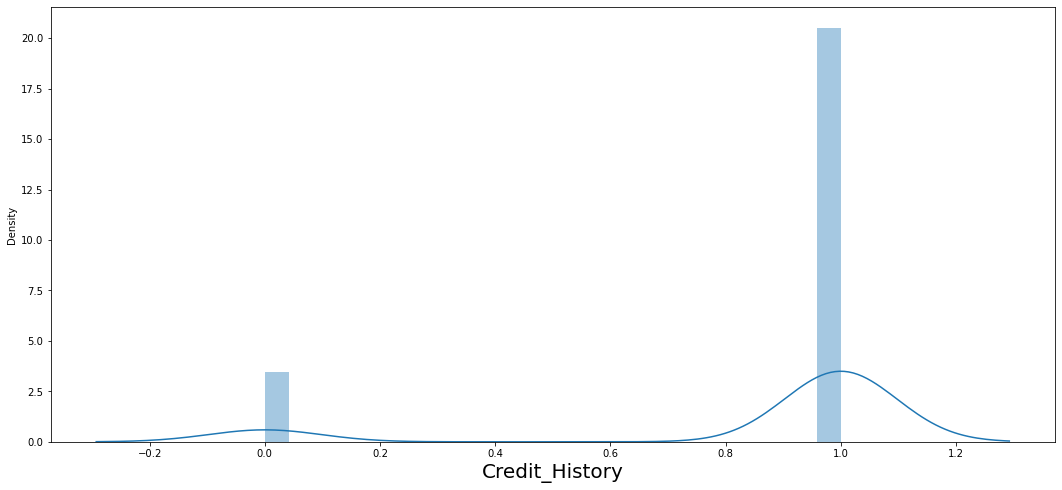

In [13]:

for i in data.columns:
    
    if data[i].dtype!='object':
        plt.figure(figsize=[18,8])
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plt.show()

In [14]:
data.shape

(614, 13)

In [15]:
data = data.drop(columns='Loan_ID')

In [16]:
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']  #columns with outliers


In [17]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
Q1 = data[features].quantile(0.25)
Q3 = data[features].quantile(0.75)
IQR = Q3-Q1

data_new1 = data[~((data[features] < (Q1-1.5*IQR)) | (data[features]> (Q3 + 1.5*Q3))).any(axis = 1)]

In [19]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new1.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new1.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (614, 12)
Shape After          : (564, 12)
Percentage Loss      : 8.143322475570033


In [20]:
from scipy.stats import zscore  #importing zscore from library
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']  #columns with outliers


z=np.abs(zscore(data[features]))
threshold = 3
data_new2 = data[(z<3).all(axis=1)]

In [21]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new2.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new2.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (614, 12)
Shape After          : (589, 12)
Percentage Loss      : 4.071661237785016


In [22]:
data_new = data_new2.copy()

In [23]:
data_new['Loan_Amount_Term'].value_counts()

360.0    506
180.0     41
480.0     14
300.0     12
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [24]:
data.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [25]:
data_new.skew()

ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.126225
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
dtype: float64

In [26]:

from sklearn.preprocessing import PowerTransformer #importing the library

scaler = PowerTransformer(method='yeo-johnson')
    
data_new['ApplicantIncome'] = scaler.fit_transform(data_new['ApplicantIncome'].values.reshape(-1,1))
data_new['CoapplicantIncome'] = scaler.fit_transform(data_new['CoapplicantIncome'].values.reshape(-1,1))
data_new['LoanAmount'] = scaler.fit_transform(data_new['LoanAmount'].values.reshape(-1,1))

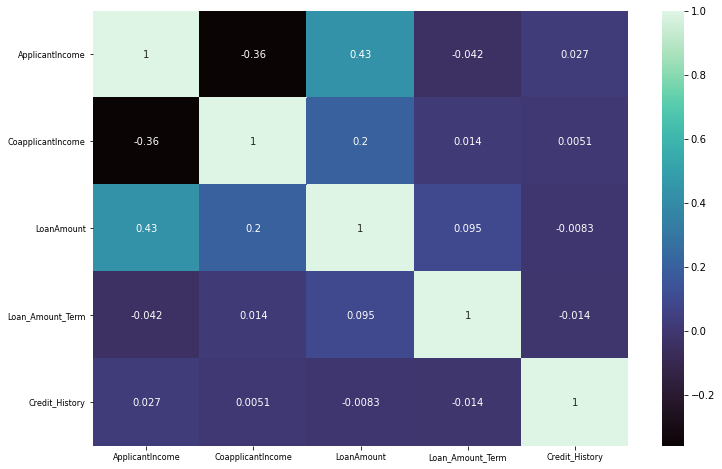

In [27]:
#Let's plot heatmap

plt.figure(figsize=(12,8))
sns.heatmap(data_new.corr(),annot=True,cmap='mako')
plt.tick_params(labelsize=8)

plt.show()

In [28]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [29]:
l1 = ['Gender', 'Married','Education','Loan_Status','Self_Employed']

In [30]:
#Let's use Label Encoder method

from sklearn.preprocessing import LabelEncoder  #importing library

le = LabelEncoder()  #calling function

for i in l1:
     if data_new[i].dtypes=='object':
            data_new[i]= le.fit_transform(data_new[i].values.reshape(-1,1))
data_new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.688986,-1.119438,-0.140470,360.0,1.0,Urban,1
1,1,1,1,0,0,0.239843,0.748807,0.011197,360.0,1.0,Rural,0
2,1,1,0,0,1,-0.525799,-1.119438,-1.380101,360.0,1.0,Urban,1
3,1,1,0,1,0,-0.791841,0.899419,-0.140470,360.0,1.0,Urban,1
4,1,0,0,0,0,0.736280,-1.119438,0.245654,360.0,1.0,Urban,1


In [31]:
data_new['Property_Area'].value_counts()

Semiurban    222
Urban        194
Rural        173
Name: Property_Area, dtype: int64

In [32]:
#Get dummies
l2 = pd.get_dummies(data_new['Property_Area'])
l3 = pd.get_dummies(data_new['Dependents'])

#Concat with main dataframe by dropping workclass dataframe
data_new=pd.concat([data_new.drop('Property_Area',axis=1),l2],axis=1)
data_new=pd.concat([data_new.drop('Dependents',axis=1),l3],axis=1)

In [33]:
data_new.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban,0,1,2,3+
0,1,0,0,0,0.688986,-1.119438,-0.140470,360.0,1.0,1,0,0,1,1,0,0,0
1,1,1,0,0,0.239843,0.748807,0.011197,360.0,1.0,0,1,0,0,0,1,0,0
2,1,1,0,1,-0.525799,-1.119438,-1.380101,360.0,1.0,1,0,0,1,1,0,0,0
3,1,1,1,0,-0.791841,0.899419,-0.140470,360.0,1.0,1,0,0,1,1,0,0,0
4,1,0,0,0,0.736280,-1.119438,0.245654,360.0,1.0,1,0,0,1,1,0,0,0


In [34]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

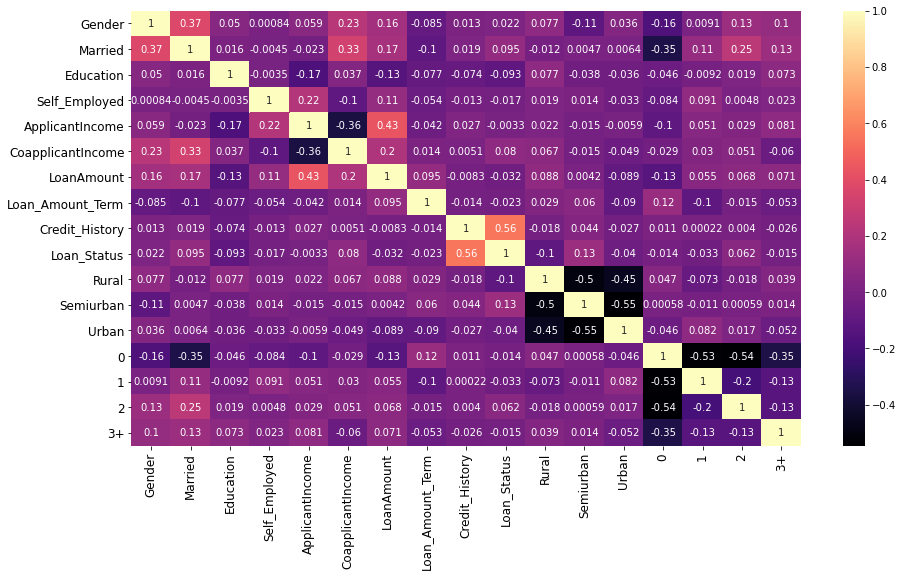

In [35]:
#Let's plot heatmap

plt.figure(figsize=(15,8))
sns.heatmap(data_new.corr(),annot=True,cmap='magma')
plt.tick_params(labelsize=12)

plt.show()

In [36]:
X = data_new.drop(columns = 'Loan_Status') #Features
Y = data_new['Loan_Status'] #Label

In [37]:
# Handiling the class having imbalance using SMOTE (Oversampling method)

from imblearn.over_sampling import SMOTE

sm=SMOTE()
X_over,Y_over = sm.fit_resample(X,Y)

In [38]:
round(Y_over.value_counts(normalize=True)*100,2).astype('str')+'%'

0    50.0%
1    50.0%
Name: Loan_Status, dtype: object

In [39]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X_over)

In [40]:
from sklearn.linear_model import LogisticRegression

maxAccuracy = 0
maxAcc = 0

for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.16,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccuracy:
        maxAccuracy = acc
        maxAcc = i
        
print('The best accuracy is ',maxAccuracy, ' with Random State ',maxAcc)

The best accuracy is  0.8778625954198473  with Random State  17


In [41]:
#TrainTestSplit
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.16,random_state = maxAcc)

In [42]:
#Importing Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
Log_Reg = LogisticRegression()
Log_Reg.fit(x_train,y_train) #training the model
y_pred_log = Log_Reg.predict(x_test) #testing and predicting data

#Accuracy Score
print("Accuracy Score:",accuracy_score(y_test,y_pred_log))
A1 = accuracy_score(y_test,y_pred_log)

#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(Log_Reg,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(Log_Reg,X_scaled,Y_over,cv=5).mean())
CV1 = cross_val_score(Log_Reg,X_scaled,Y_over,cv=5).mean()

Accuracy Score: 0.8778625954198473
Cross Validation Score:  [0.69325153 0.73619632 0.86503067 0.8404908  0.92592593]
Avg_Cross_Validation Score:  0.81217905021586


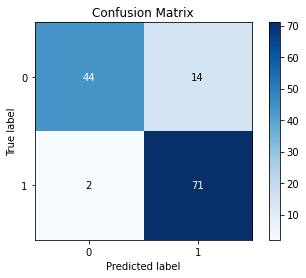

              precision    recall  f1-score   support

           0       0.96      0.76      0.85        58
           1       0.84      0.97      0.90        73

    accuracy                           0.88       131
   macro avg       0.90      0.87      0.87       131
weighted avg       0.89      0.88      0.88       131



In [44]:
#Confusion_matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred_log)
plt.show()

#classification_report
print(classification_report(y_test,y_pred_log))

In [45]:
Rand2 = RandomForestClassifier()
Rand2.fit(x_train,y_train) #training the model
y_pred_rand2 = Rand2.predict(x_test) #testing and predicting data

#Accuracy Score
A2 = accuracy_score(y_test,y_pred_rand2)

#Cross Validation Score
CV2 = cross_val_score(Rand2,X_scaled,Y_over,cv=5).mean()

In [46]:
#Accuracy Score
print("Accuracy Score:",A2)

#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(Rand2,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',CV2)

Accuracy Score: 0.8625954198473282
Cross Validation Score:  [0.77300613 0.78527607 0.8404908  0.84662577 0.88888889]
Avg_Cross_Validation Score:  0.831795803983943


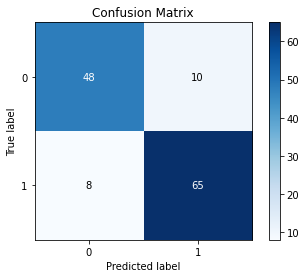

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        58
           1       0.87      0.89      0.88        73

    accuracy                           0.86       131
   macro avg       0.86      0.86      0.86       131
weighted avg       0.86      0.86      0.86       131



In [47]:
#confusion_matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred_rand2)
plt.show()

#classification_report
print(classification_report(y_test,y_pred_rand2))

In [48]:
dt = DecisionTreeClassifier() #calling the model
dt.fit(x_train,y_train) #training the model
y_pred_dt = dt.predict(x_test) #testing and predicting data

#Accuracy Score
A3 = accuracy_score(y_test,y_pred_dt)
print("Accuracy Score:",A3)


#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(dt,X_scaled,Y_over,cv=5))
CV3 = cross_val_score(dt,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV3)

Accuracy Score: 0.816793893129771
Cross Validation Score:  [0.70552147 0.73619632 0.77300613 0.74233129 0.83950617]
Avg_Cross_Validation Score:  0.7519275922138908


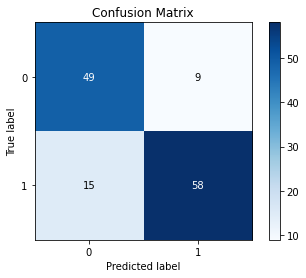

              precision    recall  f1-score   support

           0       0.77      0.84      0.80        58
           1       0.87      0.79      0.83        73

    accuracy                           0.82       131
   macro avg       0.82      0.82      0.82       131
weighted avg       0.82      0.82      0.82       131



In [49]:
#confusion_matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred_dt)
plt.show()

#classification_report
print(classification_report(y_test,y_pred_dt))

In [50]:
knn=KNeighborsClassifier() #calling the model
knn.fit(x_train,y_train) #training the model
y_pred_knn = knn.predict(x_test) #testing and predicting data

#Accuracy Score
A4 = accuracy_score(y_test,y_pred_knn)
print("Acicuracy Score:",A4)

#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(knn,X_scaled,Y_over,cv=5))
CV4 = cross_val_score(knn,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV4)

Acicuracy Score: 0.8091603053435115
Cross Validation Score:  [0.73006135 0.72392638 0.76687117 0.78527607 0.82716049]
Avg_Cross_Validation Score:  0.7666590926304628


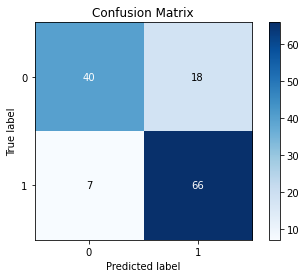

              precision    recall  f1-score   support

           0       0.85      0.69      0.76        58
           1       0.79      0.90      0.84        73

    accuracy                           0.81       131
   macro avg       0.82      0.80      0.80       131
weighted avg       0.81      0.81      0.81       131



In [51]:
#confusion_matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred_knn)
plt.show()

#classification_report
print(classification_report(y_test,y_pred_knn))

In [75]:
from sklearn.ensemble import AdaBoostClassifier

adb= AdaBoostClassifier(n_estimators=10) #calling the model
adb.fit(x_train,y_train)
y_pred_adb = adb.predict(x_test)

#Accuracy Score
A5 = accuracy_score(y_test,y_pred_adb)
print("Accuracy Score:",A5)

#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(adb,X_scaled,Y_over,cv=5))
CV5 = cross_val_score(adb,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV5)


Accuracy Score: 0.816793893129771
Cross Validation Score:  [0.68711656 0.68711656 0.76687117 0.82208589 0.81481481]
Avg_Cross_Validation Score:  0.755600999772779


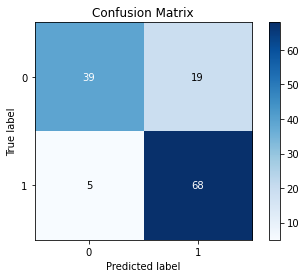

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        58
           1       0.78      0.93      0.85        73

    accuracy                           0.82       131
   macro avg       0.83      0.80      0.81       131
weighted avg       0.83      0.82      0.81       131



In [76]:
#confusion_matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred_adb)
plt.show()

#classification_report
print(classification_report(y_test,y_pred_adb))

In [54]:
from sklearn.svm import SVC

sv=SVC() #calling the model
sv.fit(x_train,y_train) #training the model
y_pred_sv = sv.predict(x_test) #testing and predicting data

#Accuracy Score
A6 = accuracy_score(y_test,y_pred_sv)
print("Accuracy Score:",A6)

#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(sv,X_scaled,Y_over,cv=5))
CV6 = cross_val_score(sv,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV6)


Accuracy Score: 0.8702290076335878
Cross Validation Score:  [0.73006135 0.72392638 0.86503067 0.85276074 0.88888889]
Avg_Cross_Validation Score:  0.8121336059986366


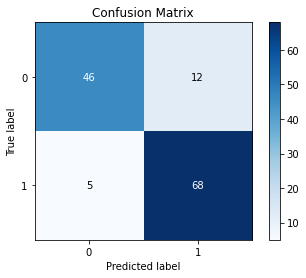

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        58
           1       0.85      0.93      0.89        73

    accuracy                           0.87       131
   macro avg       0.88      0.86      0.87       131
weighted avg       0.87      0.87      0.87       131



In [55]:
#confusion_matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred_sv)
plt.show()

#classification_report
print(classification_report(y_test,y_pred_sv))

In [56]:
from sklearn.naive_bayes import BernoulliNB

nb=BernoulliNB() #calling the model
nb.fit(x_train,y_train) #training the model
y_pred_nb = nb.predict(x_test) #testing and predicting data

#Accuracy Score
A7 = accuracy_score(y_test,y_pred_nb)
print("Accuracy Score:",A7)

#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(nb,X_scaled,Y_over,cv=5))
CV7 = cross_val_score(nb,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV7)

Accuracy Score: 0.7862595419847328
Cross Validation Score:  [0.69325153 0.73619632 0.74846626 0.73006135 0.82716049]
Avg_Cross_Validation Score:  0.747027190789972


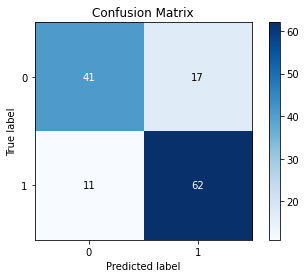

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        58
           1       0.78      0.85      0.82        73

    accuracy                           0.79       131
   macro avg       0.79      0.78      0.78       131
weighted avg       0.79      0.79      0.78       131



In [57]:
#confusion_matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred_nb)
plt.show()

#classification_report
print(classification_report(y_test,y_pred_nb))

In [77]:
Overall_Score = pd.DataFrame({'Model':['Logistic Regression','Random Forest Classifier','Decision Tree',
                                       'KNeighbors Classifier','AdaBoost Classifier','SVC','BernoulliNB Classifier'],
                              'Accuracy_Score':[A1,A2,A3,A4,A5,A6,A7],
                              'Cross_Validation_Score':[CV1,CV2,CV3,CV4,CV5,CV6,CV7]})


Overall_Score['Difference'] = Overall_Score['Accuracy_Score'] - Overall_Score['Cross_Validation_Score']

In [78]:
Overall_Score

,Model,Accuracy_Score,Cross_Validation_Score,Difference
0,Logistic Regression,0.877863,0.812179,0.065684
1,Random Forest Classifier,0.862595,0.831796,0.030800
2,Decision Tree,0.816794,0.751928,0.064866
3,KNeighbors Classifier,0.809160,0.766659,0.042501
4,AdaBoost Classifier,0.816794,0.755601,0.061193
5,SVC,0.870229,0.812134,0.058095
6,BernoulliNB Classifier,0.786260,0.747027,0.039232


In [79]:
Overall_Score['Difference'].min()

0.0307996158633852

In [80]:
Overall_Score[Overall_Score['Difference']==0.0307996158633852]

,Model,Accuracy_Score,Cross_Validation_Score,Difference
1,Random Forest Classifier,0.862595,0.831796,0.0308


## Hyper Parameter Tuning

In [ ]:
#Importing library
from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators': range(2,50,3),'criterion': ['entropy'],'max_depth': range(2,30,2),
            'max_features':['auto', 'sqrt'],'max_leaf_nodes':range(2,30,2),'min_samples_split':[2,3,4]}

gridsearch=GridSearchCV(estimator=Rand2,param_grid=param_grid,cv=5)

gridsearch.fit(x_train,y_train)

In [ ]:
print(gridsearch.best_score_, gridsearch.best_params_)

In [ ]:
Rand_final = RandomForestClassifier(n_estimators= 47, criterion = 'entropy', max_depth = 18, 
                                    max_features = 'sqrt',min_samples_split = ,max_leaf_nodes = )
                                    #class_weight = , max_leaf_nodes = = ,max_leaf_nodes =)

Rand_final.fit(x_train,y_train)
y_pred = Rand_final.predict(x_test)

In [ ]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Cross Validation Score: ", cross_val_score(Rand_final,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(Rand_final,X_scaled,Y_over,cv=5).mean())